# 4.0 - Data Prep

## 4.1 - Introdução:

Data Prep ou Data Preparation é a etapa inicial e fundamental de uma análise de dados bem feita. Consiste na limpeza e na preparação dos dados brutos antes de usá-los. Um bom preparo de dados, possibilita uma análise mais precisa e confiável.
As etapas de data prep, geralmente são as seguintes:

1. **Aquisição de dados (Acquire Data):** etapa que consiste na busca pelas informações que são necessárias, na coleta e no acesso desses dados. Geralmente os dados são obtidos em um formato como um documento do Excel ou CSV;
2. **Exploração dos dados (Explore):** consiste em determinar a qualidade dos dados e analisar a relação entre as variáveis. Nessa etapa é comum usar análises estatísticas como intervalos, média e desvio padrão;
3. **Limpeza dos dados (Cleanse):** consiste em melhorar a qualidade dos dados para que a análise seja mais precisa possível. Nessa etapa é comum ocorrer a correção de erros de entrada, remoção de dados duplicados ou outliers, e a eliminação de dados ausentes;
4. **Transformação dos dados (Transform):** consiste na formatação, orientação e agragação dos dados usados na análise. Alguns exemplos de transformação de dados são: alterar a orientação dos dados, converter formatos de variáveis (datas), agregar dados, etc.

A imagem a seguir ilustra a relação entre os processos na construção de um bom modelo. Também podemos perceber onde que a etapa de preparo de dados se encaixa no ciclo entre os processos:

<img src="https://miro.medium.com/max/708/1*Xkuq_UUrZJ_nnzSCutnu6Q.png"></img>

## 4.2 - Tratamento de missings:

Os missings correspondem aos dados que estão ausentes, ou seja, estão faltando dentro do conjunto de dados analisado. Os missings geralmente aparecem como células vazias, valores NULL, NA (Not Avaliable), ou como caracteres particulares, por exemplo o ponto de interrogação (?). O tratamento desses dados ausentes, acontece na etapa de Data Cleansing. Temos algumas maneiras de tratar os missings:
1. Remover as observações que contém dados faltando, porém ao fazer isso, perdemos algumas informações que poderiam ser importantes;
2. Adicionar informações no lugar dos missings baseado em outras observações, porém ao fazer isso, estamos assumindo valores e não observações reais;
3. Alterar a forma que os dados estão sendo usados;

O exemplo abaixo ilustra os missings presentes no conjunto de dados do Ibovespa no ano de 2021. Como esses dados não possuem missings, foram criados os dados ausentes, por meio de uma média móvel de 9 períodos nas primeiras linhas. Isso ocorreu, pois antes dos primeiros 9 registros, não existia uma base de dados para se aplicar a média móvel.

In [10]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from datetime import datetime as dt
import numpy as np

dt_inicio = '2021-01-01'
hoje = f'{dt.today().year}-{dt.today().month}-{dt.today().day}'
dt_final = hoje

ibov = web.DataReader('^BVSP', data_source='yahoo', start=dt_inicio, end=dt_final)

ibov['MMA9'] = ibov['Adj Close'].rolling(9).mean()

ibov.head()

,High,Low,Open,Close,Volume,Adj Close,MMA9
Date,,,,,,,
2021-01-04,120354.0,118062.0,119024.0,118558.0,8741400.0,118558.0,NaN
2021-01-05,119790.0,116756.0,118835.0,119223.0,9257100.0,119223.0,NaN
2021-01-06,120924.0,118917.0,119377.0,119851.0,11638200.0,119851.0,NaN
2021-01-07,121983.0,119101.0,119103.0,121956.0,11774800.0,121956.0,NaN
2021-01-08,125324.0,122386.0,122387.0,125077.0,11085800.0,125077.0,NaN


* **1- Remover os missings:**

In [127]:
ibov_drop = ibov.dropna()
ibov_drop.head()

,High,Low,Open,Close,Volume,Adj Close,MMA9
Date,,,,,,,
2021-01-14,123896.0,121947.0,121947.0,123481.0,8974400.0,123481.0,121887.888889
2021-01-15,123472.0,120374.0,123472.0,120502.0,9387600.0,120502.0,122103.888889
2021-01-18,122586.0,120351.0,120351.0,121242.0,7223100.0,121242.0,122328.222222
2021-01-19,122120.0,119257.0,121250.0,120673.0,7886000.0,120673.0,122419.555556
2021-01-20,121449.0,118740.0,120645.0,119708.0,7947300.0,119708.0,122169.777778


* **2- Preencher os missings (os missings foram preenchidos com 0):**

In [129]:
ibov_fill = ibov.fillna(0)
ibov_fill.head()

,High,Low,Open,Close,Volume,Adj Close,MMA9
Date,,,,,,,
2021-01-04,120354.0,118062.0,119024.0,118558.0,8741400.0,118558.0,0.0
2021-01-05,119790.0,116756.0,118835.0,119223.0,9257100.0,119223.0,0.0
2021-01-06,120924.0,118917.0,119377.0,119851.0,11638200.0,119851.0,0.0
2021-01-07,121983.0,119101.0,119103.0,121956.0,11774800.0,121956.0,0.0
2021-01-08,125324.0,122386.0,122387.0,125077.0,11085800.0,125077.0,0.0


* **3- Mudar os valores dos missings (nesse caso, trocamos os missings pelos próximos valores não nulos do conjunto de dados):**

In [130]:
ibov_fill_2 = ibov.fillna(method='bfill', axis=0).fillna(0)
ibov_fill_2.head()

,High,Low,Open,Close,Volume,Adj Close,MMA9
Date,,,,,,,
2021-01-04,120354.0,118062.0,119024.0,118558.0,8741400.0,118558.0,121887.888889
2021-01-05,119790.0,116756.0,118835.0,119223.0,9257100.0,119223.0,121887.888889
2021-01-06,120924.0,118917.0,119377.0,119851.0,11638200.0,119851.0,121887.888889
2021-01-07,121983.0,119101.0,119103.0,121956.0,11774800.0,121956.0,121887.888889
2021-01-08,125324.0,122386.0,122387.0,125077.0,11085800.0,125077.0,121887.888889


## 4.3 - Tratamento de outliers:

Os outliers, chamados de pontos fora da curva, são aqueles valores que destoam dos demais, ou seja, são aqueles valores discrepantes que divergem dos outros valores no conjunto de dados. Se esses outliers não forem tratados, pode ocorrer muitos erros devido a um erro inicial. Abaixo temos uma comparação do efeito de um outlier no mesmo conjunto de dados:

* O primeiro exemplo mostra os dados sem o outlier: 

<img src="https://miro.medium.com/max/194/1*O2o-J6lcSecG37niE9hLLw.png" />

* Já o segundo exemplo mostra as consequências causadas pelo outlier:

<img src="https://miro.medium.com/max/204/1*7wr29KfKnPS3Ehacd_kvfQ.png" />

Com os outliers identificados, podemos usar alguns métodos para tratar esses dados:
1. **Excluir os outliers:** recomendado quando o nosso conjunto de dados é grande o suficiente para se fazer isso;
2. **Filtrar os outliers:** podemos usar filtros como uma média móvel;
3. **Análise individual:** recomendado quando temos uma quantidade de outliers significante e em casos mais extremos, por exemplo, as empresas que tiveram lucro mesmo em período de pandemia;

O exemplo abaixo ilustra os outliers presentes no Ibov, de janeiro de 2020, até o primeiro circuit breaker que ocorreu dia 09/03 do mesmo ano. Estamos utilizando o preço de fechamento dos candles, e plotando estes valores em um boxplot para ilustrar os outliers de maneira mais fácil. Após isso, fizemos um tratamento destes outliers, removendo os valores que são menores que o quartil 1 (inferiores a 25% dos dados) e maiores que o quartil 3 (superiores a 75% dos dados):

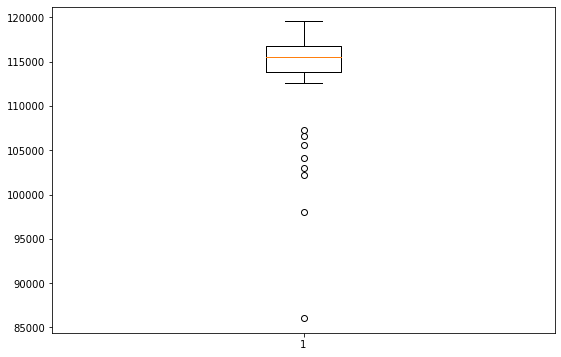

In [59]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import numpy as np

dt_inicio = '2020-01-01'
dt_final = '2020-03-09'

ibov = web.DataReader('^BVSP', data_source='yahoo', start=dt_inicio, end=dt_final)

dados = np.array([ibov['Close']])

def excluir_outliers(t):
    fator = 1.5        
    q3, q1 = np.percentile(t, [75, 25])
    iqr = q3 - q1
    
    lowpass = q1 - (iqr * fator)
    highpass = q3 + (iqr * fator)

    outliers = np.argwhere(t < lowpass)
    t = np.delete(t, outliers)

    outliers = np.argwhere(t > highpass)
    t = np.delete(t, outliers)

    return t

fig = plt.figure(1, figsize=(9, 6))
plt.boxplot(ibov['Close'])

dados = excluir_outliers(dados)

{'whiskers': [<matplotlib.lines.Line2D at 0x16058789790>,
 'caps': [<matplotlib.lines.Line2D at 0x16058789e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x16058789430>],
 'medians': [<matplotlib.lines.Line2D at 0x16058783550>],
 'fliers': [<matplotlib.lines.Line2D at 0x160587838b0>],
 'means': []}

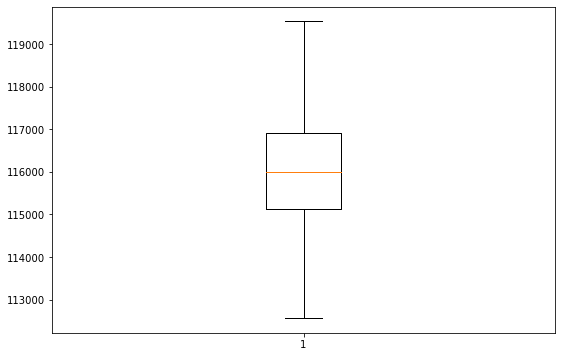

In [60]:
fig = plt.figure(1, figsize=(9, 6))
plt.boxplot(dados)

## 4.4 - PCA (Principal Component Analysis):

PCA é traduzido como a análise de componentes principais, e é definida como uma ferramenta utilizada dentro da análise de dados para a divisão de um problema maior em partes menores, ou seja, quando temos um ou dois eixos no conjunto de dados, a visualização desses dados é simples, pois temos um gráfico 2D (de duas dimensões), porém quando aumentamos as variáveis (eixos), também precisamos aumentar as dimensões. Desta maneira o PCA reduz o número de variáveis do conjunto de dados, preservando o máximo de informações possíveis.

A imagem abaixo ilustra o PCA aplicado sobre o conjunto de dados Iris, que é bem conhecida dentro do Machine Learning:

<img src="https://miro.medium.com/max/1056/1*_NK2wo5o0ngQ-MfdoXe1aw.png" width="500px"></img>

As variáveis que foram divididas são chamadas de componentes, onde o componente principal é a combinação linear das variáveis originais. Já o segundo componente principal explica a variação restante dos dados, e não está relacionado com o primeiro componente principal.

O exemplo prático abaixo em Python, ilustra o PCA aplicado no conjunto de dados Iris:

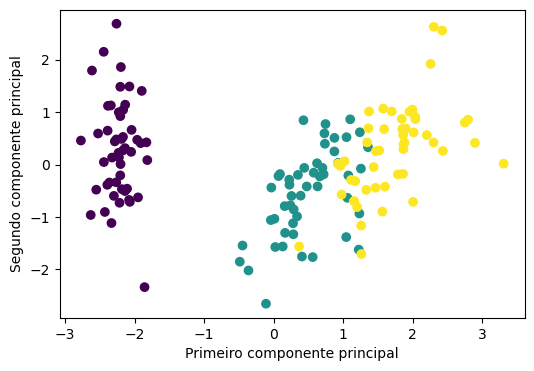

In [60]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

data = load_iris()

df = pd.DataFrame(data['data'], columns=data['feature_names'])

scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)
scaled_data

pca = PCA(n_components=2)
pca.fit(scaled_data)

X_pca = pca.transform(scaled_data)

plt.figure(figsize=(6,4))
plt.scatter(X_pca[:,0], X_pca[:,1], c=data['target'])
plt.xlabel('Primeiro componente principal')
plt.ylabel('Segundo componente principal')
plt.show()

## 4.5 - Correlação e associação:

Uma correlação é a semelhança entre duas coisas, ou seja, é a medida entre duas variáveis que se relacionam. Em alguns casos essa relação não é tão evidente assim, para isso é usado alguns métodos para fazer essa deteccção, entre eles estão os índices de Pearson, Spearman e Kendall. A imagem a seguir exemplifica os tipos de correlação que acontecem:

<img src="https://bookdown.org/cienciadedadosnaep/ciencia_de_dados/Fig_correlacao.png" width="500px"></img>

A seguir, é definido os principais tipos de coeficientes de correlação:

* **Coeficiente de correlação de Pearson:** também chamado de $\rho$ de Pearson, mede o grau de correlação entre duas variáveis. É representado por $\rho$ que assume valores entre -1 e 1.
    * **Valores de $\rho$ (+ ou -):**
        * **0.9 a 1:** indica uma correlação muito forte;
        * **0.7 a 0.9:** indica uma correlação forte;
        * **0.5 a 0.7:** indica uma correlação moderada;
        * **0.3 a 0.5:** indica uma correlação fraca; 
        * **0 a 0.3:** indica uma correlação desprezível.

---

* **Coeficiente de correlação de Spearman:** é usado para o cálculo de correlação entre variáveis aleatórias x e y relacionadas repetidas vezes entre si. As variáveis x e y assumem novos valores de acordo com o posto de cada variável de maneira ordenada, ou seja, o menor valor será 1 e o segundo menor será 2, e assm por diante.

---

* **Coeficiente de correlação de Kendall:** é a correlação de postos que faz a verificação da semelhança entre as ordens dos dados. O coeficiente de correlação de Kendall é eficiente para dados discretos. Essa correlação leva em consideração a direção dos pares concordantes e discordantes:
    * **Concordantes:** obdecem uma relação entre pares de dados, por exemplo temos os seguintes pares de dados:
        * (1, 2) e (4, 9), ambos obdecem a regra que $x_{1} < x_{2}$ e $y_{1} < y_{2}$
    * **Discordantes:** não obdecem as regras entre os pares de dados, por exemplo temos os seguintes pares:
        * (1, 2) e (4, 1), o primeiro par obdece a regra que $x_{1} < x_{2}$, porém o segundo par é definido por $y_{1} > y_{2}$

O código abaixo mostra a correlação entre o Ibovespa e o Dólar, a base de dados obtida foi do ano de 2021 até o dia atual (02/09/2021):

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

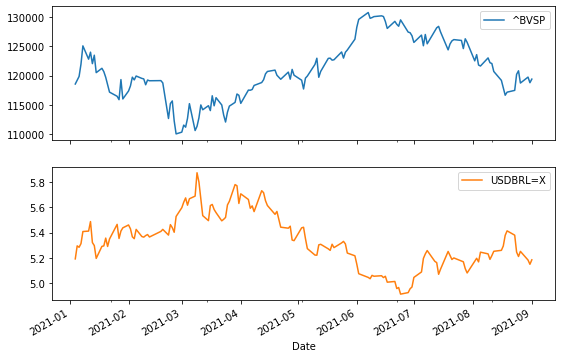

In [1]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from datetime import datetime as dt
import seaborn as sns
import numpy as np

dt_inicio = '2021-01-01'
hoje = f'{dt.today().year}-{dt.today().month}-{dt.today().day}'
dt_final = hoje

ativos = ['^BVSP', 'USDBRL=X']
dados = web.DataReader(ativos, data_source='yahoo', start=dt_inicio, end=dt_final)['Close']

dados = dados.dropna()
dados.plot(subplots=True, figsize=(9,6))

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

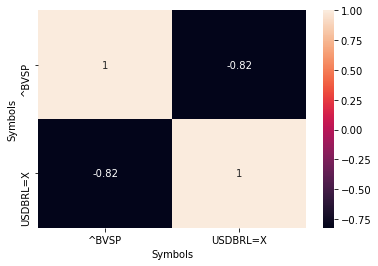

In [2]:
sns.heatmap(dados.corr(), annot=True)

## 4.6 - Seleção de variáveis:

Para se obter um melhor desempenho do modelo, é importante fazer a seleção de variáveis/atributos, removendo aqueles valores que não interferem na análise ou que acabam gerando um ruído ao modelo. Existem dois métodos para se fazer essa tarefa:

* **Wrapper (Embrulho):** nesse método são usados e testados vários modelos de uma vez só com diversas combinações de variáveis, e no final são escolhidas as variáveis que tiveram uma melhor performance com determinado modelo. Para saber isso, são usadas as métricas de avaliação. Neste método, é usada a ferramenta chamada **RFE (Recursive Feature Elimination)**, que faz uma eliminação de variáveis através da recursividade, atribuindo pesos e dividindo o conjunto de dados em partes menores.

* **Filter (Filtro):** já no Filter, usamos métodos estatísticos, que medem a relação entre as variáveis preditoras e a variável target, e com os resultados, podemos filtrar apenas os atributos com melhores valores.

Antes de se usar o filtro, devemos entender os tipos de variáveis, pois para cada um dos tipos, existe um filtro estatístico específico:
* **Categóricas (Qualitativas):** baseadas em uma categoria, ou seja, definem a classificação de variáveis. Podem ser nominais ou ordinais:
    * **Nominal:** sem uma ordem de categoria, por exemplo: nome, cor dos olhos, gênero, etc.
    * **Ordinal:** com uma ordem de categoria, por exemplo: tamanho(pequeno, médio, grande), colocação(1º, 2º, 3º), etc.

* **Númericas (Quantitativas):** baseadas em quantidades, ou seja, são definidas por um conjunto de números. Podem ser discretas ou contínuas:
    * **Discreta:** definida por um número finito ou infinito contável de valores, por exemplo: número de casas em um bairro, número de filhos, etc.
    * **Contínua:** definida por uma escala de números na reta real, por exemplo: peso, altura, etc.

Agora sim, podemos definir qual é o melhor filtro para cada caso:
* **Entrada e saída numérica:** isso ocorre em um modelo de regressão, e usamos a correlação de Pearson para relações lineares e a correlação de Spearman para correlações não lineares;
* **Entrada numérica e saída categórica:** ocorre em um modelo de classificação, e usamos o filtro estatístico ANOVA;
* **Entrada e saída categórica:** ocorre em um modelo de classificação, e usamos o Chi-quadrado

Acima definimos quais são os melhores filtros para cada caso. Agora, na prática abaixo, usamos o filtro estatístico como hiperparâmetro para a função **SelectKBest**, definindo um filtro para cada caso:

In [7]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

X, y = make_regression(n_samples=100, n_features=15, n_informative=10)
df = pd.DataFrame(X, y)

* **Entrada e saída numérica:** *SelectKBest(score_func=f_regression, k=num_atributos)*;

In [12]:
fs = SelectKBest(score_func=f_regression, k=10)
X_selected = fs.fit_transform(X, y)
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
369.998000,0.406024,-0.809199,-0.893296,-1.180890,2.238043,0.821767,-2.092160,1.262818,0.332266,0.854034,0.184843,-0.366620,1.343535,-0.744025,-0.340360
-68.970285,-0.734160,0.955204,1.956746,-0.595446,0.418756,0.076482,-0.631942,0.665424,-1.943369,0.750427,-1.223105,-1.287076,-1.452826,0.761251,0.676671
-160.504047,-0.751342,0.664213,-0.938054,-0.362603,-1.828881,1.663795,0.099524,-1.619524,0.327485,-0.681375,-0.448215,0.666524,1.081071,-0.256418,0.107667


In [9]:
df2 = pd.DataFrame(X_selected,y).reset_index()
df2.columns = ['target', 0,1,2,3,4,5,6,7,8,9]
df2.head(3)

,target,0,1,2,3,4,5,6,7,8,9
0,369.998000,0.406024,-0.809199,2.238043,0.821767,1.262818,0.332266,0.854034,1.343535,-0.744025,-0.340360
1,-68.970285,-0.734160,0.955204,0.418756,0.076482,0.665424,-1.943369,0.750427,-1.452826,0.761251,0.676671
2,-160.504047,-0.751342,0.664213,-1.828881,1.663795,-1.619524,0.327485,-0.681375,1.081071,-0.256418,0.107667


* **Entrada numérica e saída categórica:** *SelectKBest(score_func=f_classif, k=num_atributos)*;

In [14]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import f_classif, chi2

X, y = make_classification(n_samples=1000, n_features=10, n_informative=2)
df = pd.DataFrame(X,y).reset_index()
df.columns = ['target', 0,1,2,3,4,5,6,7,8,9]
df.head(3)

,target,0,1,2,3,4,5,6,7,8,9
0,0,0.946907,0.840051,0.119816,-1.543591,-0.451183,-1.555182,0.338894,-0.505811,-1.045134,-0.529869
1,0,-0.126371,-0.722802,0.654946,-0.861741,-0.723096,-1.567948,-1.525061,0.434887,-0.069682,-1.205197
2,0,1.382497,-1.625408,0.438190,2.107949,0.356679,0.173971,-1.177406,0.114117,2.858906,-1.810398


In [15]:
fs = SelectKBest(score_func=f_classif, k=5)
X_selected = fs.fit_transform(X, y)
resultados = pd.DataFrame({'Colunas':range(10),
                           'F_Scores':fs.scores_,
                           'p-Values':np.round(fs.pvalues_,3)}).sort_values(by='F_Scores', ascending=False)
resultados.head(5)

,Colunas,F_Scores,p-Values
9,9,1632.334130,0.000
5,5,711.281887,0.000
8,8,160.752777,0.000
7,7,5.734989,0.017
6,6,0.763750,0.382


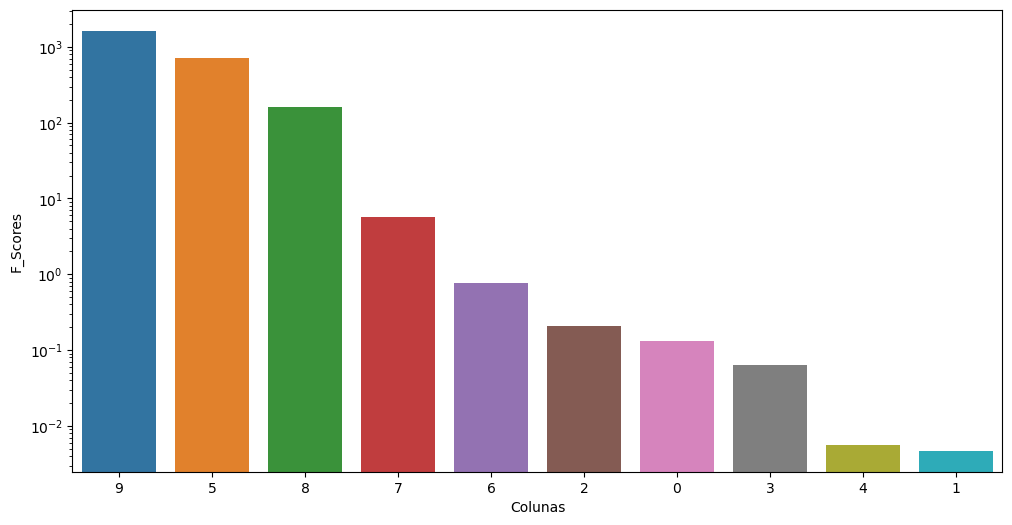

In [24]:
plt.figure(figsize=(12,6))
g = sns.barplot(x='Colunas', y='F_Scores', data=resultados, order=resultados.sort_values('F_Scores', ascending=False).Colunas)
g.set_yscale("log")
plt.show()